In [1]:
# import necessary packages

from scipy import signal
from scipy.signal import butter, iirnotch, lfilter, welch
import numpy as np
import matplotlib.pyplot as plt 
from scipy.misc import electrocardiogram 

In [2]:
#loading the input ecg and plotting the same 

ecg=electrocardiogram()  

'''''Load an electrocardiogram as an example for a 1-D signal.
    The returned signal is a 5 minute long electrocardiogram (ECG), a medical
    recording of the heart's electrical activity, sampled at 360 Hz.
    Returns
    -------
    ecg : ndarray
        The electrocardiogram in millivolt (mV) sampled at 360 Hz.
    Note:
    The provided signal is an excerpt (19:35 to 24:35) from the `record 208`_
    (lead MLII) provided by the MIT-BIH Arrhythmia Database [1]_ on
    PhysioNet [2]_. The excerpt includes noise induced artifacts, typical
    heartbeats as well as pathological changes.''' 

"''Load an electrocardiogram as an example for a 1-D signal.\n    The returned signal is a 5 minute long electrocardiogram (ECG), a medical\n    recording of the heart's electrical activity, sampled at 360 Hz.\n    Returns\n    -------\n    ecg : ndarray\n        The electrocardiogram in millivolt (mV) sampled at 360 Hz.\n    Note:\n    The provided signal is an excerpt (19:35 to 24:35) from the `record 208`_\n    (lead MLII) provided by the MIT-BIH Arrhythmia Database [1]_ on\n    PhysioNet [2]_. The excerpt includes noise induced artifacts, typical\n    heartbeats as well as pathological changes."

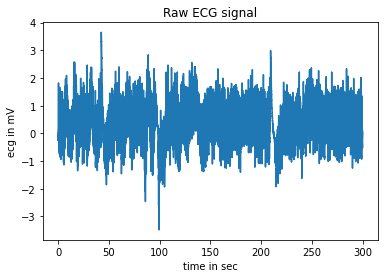

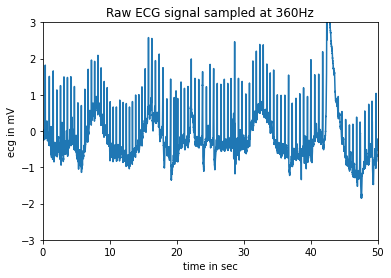

In [3]:
#ecg signal sampled at 360Hz
fs=360

#Baseline wander is a low-frequency noise of around 0.5 to 0.6 Hz. 
#To remove it, a high-pass filter of cut-off frequency 0.5 to 0.6 Hz can be used.
cutoff_high = 0.5
cutoff_low = 40
powerline = 60

## Order of five works well with ECG signals
order = 5

#plotting raw input ecg signal 
time=np.arange(ecg.size)/fs
plt.figure(1) 
plt.plot(time,ecg)
plt.title("Raw ECG signal")
plt.xlabel("time in sec")
plt.ylabel("ecg in mV")   
plt.show()

plt.plot(time,ecg)
plt.title("Raw ECG signal sampled at 360Hz")
plt.xlabel("time in sec")
plt.ylabel("ecg in mV") 
plt.xlim(0,50)  
plt.ylim(-3,3)
plt.show()

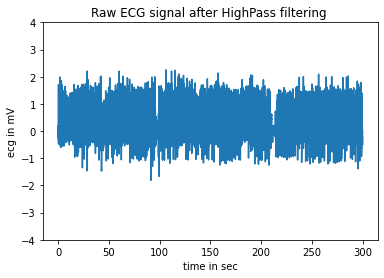

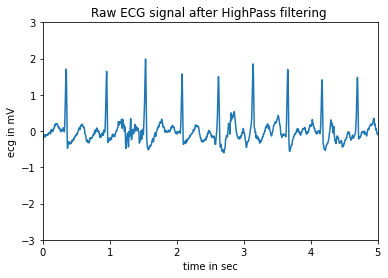

In [4]:
## A high pass filter allows frequencies higher than a cut-off value 
#high frequency noise (electromyogram noise, additive white Gaussian noise, and power line interference) 

nyq = 0.5*fs
normal_cutoff = cutoff_high/nyq
b, a = butter(order, normal_cutoff, btype='high', analog=False, output='ba')  
x = lfilter(b, a, ecg)  


plt.plot(time,x)
plt.title("Raw ECG signal after HighPass filtering ")
plt.xlabel("time in sec")
plt.ylabel("ecg in mV") 
plt.ylim(-4,4)
plt.show()


plt.plot(time,x)
plt.title("Raw ECG signal after HighPass filtering ")
plt.xlabel("time in sec")
plt.ylabel("ecg in mV") 
plt.xlim(0,5)  
plt.ylim(-3,3)
plt.show()


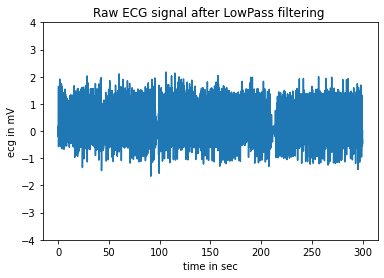

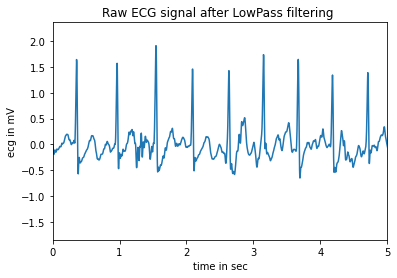

In [5]:
## A low pass filter allows frequencies lower than a cut-off value  
#low frequency noise (baseline wandering)


nyq = 0.5*fs
normal_cutoff = cutoff_low/nyq
b, a = butter(order, normal_cutoff, btype='low', analog=False, output='ba')
y = lfilter(b, a, x) 


plt.plot(time,y)
plt.title("Raw ECG signal after LowPass filtering ")
plt.xlabel("time in sec")
plt.ylabel("ecg in mV") 
plt.ylim(-4,4)
plt.show()


plt.plot(time,y)
plt.title("Raw ECG signal after LowPass filtering ")
plt.xlabel("time in sec")
plt.ylabel("ecg in mV") 
plt.xlim(0,5)  
#plt.ylim(-1,1)
plt.show()  


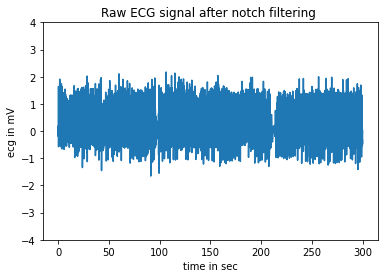

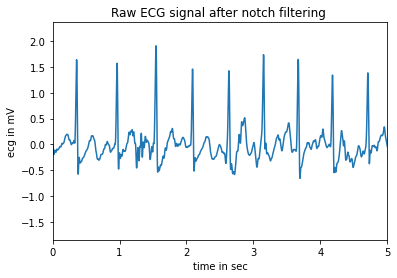

In [6]:
#A notch filter is a band-stop filter with a narrow bandwidth (high quality factor). 
#It rejects a narrow frequency band and leaves the rest of the spectrum little changed

#to remove powerline interference (50-60 Hz) ,notch filter of cutoff 60 Hz is used

q=30
nyq = 0.5*fs
freq = powerline/nyq
b, a = iirnotch(freq, q) 
z = lfilter(b, a, y) 


plt.plot(time,z)
plt.title("Raw ECG signal after notch filtering ")
plt.xlabel("time in sec")
plt.ylabel("ecg in mV") 
plt.ylim(-4,4)
plt.show()


plt.plot(time,z)
plt.title("Raw ECG signal after notch filtering ")
plt.xlabel("time in sec")
plt.ylabel("ecg in mV") 
plt.xlim(0,5)  
#plt.ylim(-2,1)
plt.show()


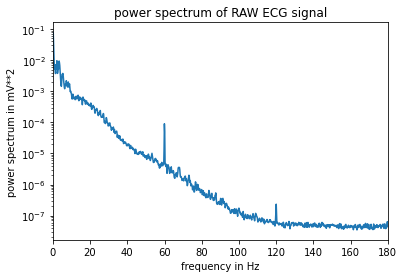

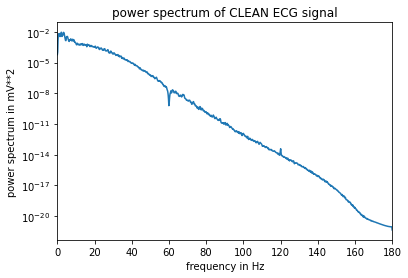

In [7]:
#examining the power spectrum reveals that most of the biosignal is made up of lower frequencies. 
#At 60 Hz the noise induced by the mains electricity can be clearly observed

f,Pxx= welch(ecg,fs=fs,nperseg=2048,scaling="spectrum")  
plt.semilogy(f,Pxx)
plt.title("power spectrum of RAW ECG signal") 
plt.xlabel("frequency in Hz")
plt.ylabel("power spectrum in mV**2") 
plt.xlim(f[[0,-1]])
plt.show()

f,Pxx= welch(z,fs=fs,nperseg=2048,scaling="spectrum") 
plt.semilogy(f,Pxx)
plt.title("power spectrum of CLEAN ECG signal") 
plt.xlabel("frequency in Hz")
plt.ylabel("power spectrum in mV**2") 
plt.xlim(f[[0,-1]])
plt.show() 


In [17]:
#calculating signal-to-noise Ratio
from scipy import stats

def signaltonoise(Arr, axis=0, ddof=0):
    Arr = np.asanyarray(Arr)
    me = Arr.mean(axis)
    sd = Arr.std(axis=axis, ddof=ddof)
    return 20*np.log10(abs(np.where(sd == 0, 0, me/sd)))

print(signaltonoise(ecg,axis=0,ddof=0)) 
print(signaltonoise(z,axis=0,ddof=0)) 





-11.196721365855641
-75.82629290865006
